In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Ignore warnings 
import warnings
warnings.filterwarnings("ignore")

In [4]:
bank = pd.read_csv("bank-full.csv")

In [5]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [6]:
# checking the data 
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
# data summary 
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
bank['Target'].value_counts()

Target
no     39922
yes     5289
Name: count, dtype: int64

<Axes: xlabel='Target', ylabel='count'>

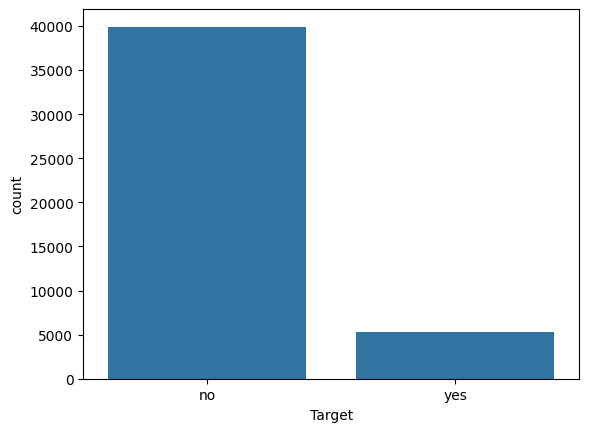

In [9]:
sns.countplot(x = 'Target',data = bank)

In [10]:
# Now Split DataSet into 2 parts
# Numeric type and Categorical type
df_num=bank.select_dtypes(['int64','float64'])
df_cat=bank.select_dtypes(object)

In [11]:
df_num.std()

age           10.618762
balance     3044.765829
day            8.322476
duration     257.527812
campaign       3.098021
pdays        100.128746
previous       2.303441
dtype: float64

In [12]:
df_num.mean()

age           40.936210
balance     1362.272058
day           15.806419
duration     258.163080
campaign       2.763841
pdays         40.197828
previous       0.580323
dtype: float64

In [13]:
df_num.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [14]:
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [15]:
# To convert categorical type data into numeric type.
# Use Label Encoder
from sklearn.preprocessing import LabelEncoder

In [16]:
for col in df_cat:
    # create an object of LabelEncoder
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [17]:
df_cat.dtypes

job          int32
marital      int32
education    int32
default      int32
housing      int32
loan         int32
contact      int32
month        int32
poutcome     int32
Target       int32
dtype: object

In [18]:
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,4,1,2,0,1,0,2,8,3,0
1,9,2,1,0,1,0,2,8,3,0
2,2,1,1,0,1,1,2,8,3,0
3,1,1,3,0,1,0,2,8,3,0
4,11,2,3,0,0,0,2,8,3,0


In [19]:
# After applying LabelEncoder we concatenate df_cat and df_num.
banknew=pd.concat([df_num,df_cat],axis=1)

In [20]:
banknew

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,9,1,2,0,0,0,0,9,3,1
45207,71,1729,17,456,2,-1,0,5,0,0,0,0,0,0,9,3,1
45208,72,5715,17,1127,5,184,3,5,1,1,0,0,0,0,9,2,1
45209,57,668,17,508,4,-1,0,1,1,1,0,0,0,1,9,3,0


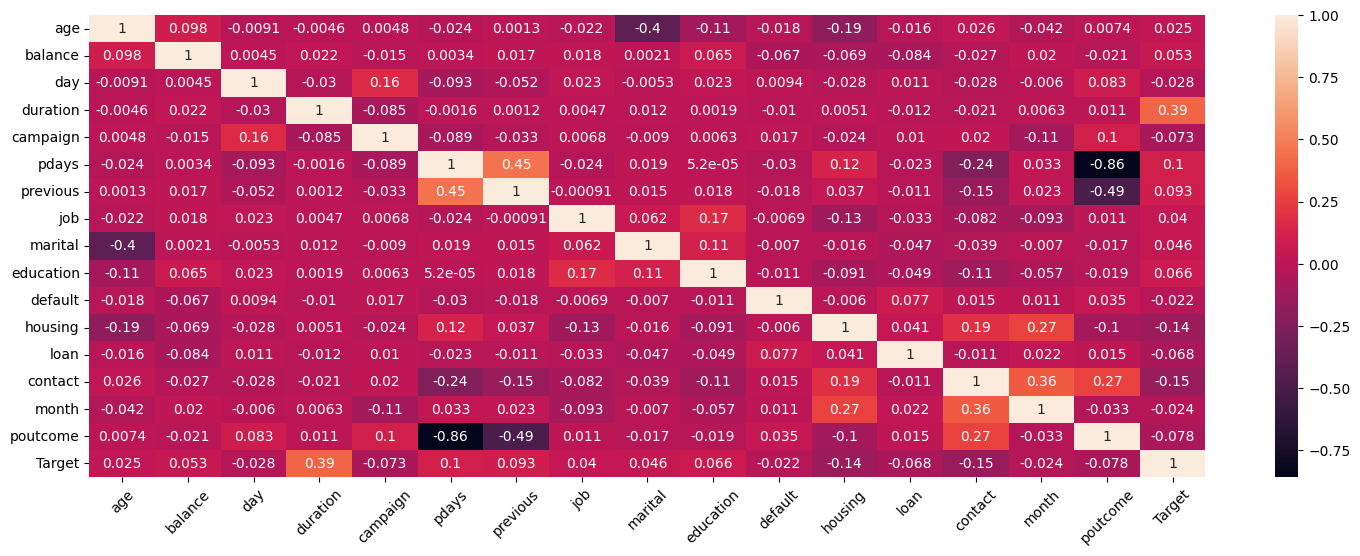

In [21]:
# making the heatmap of that 
fig= plt.figure(figsize=(18, 6))
sns.heatmap(banknew.corr(), annot=True);
plt.xticks(rotation=45);

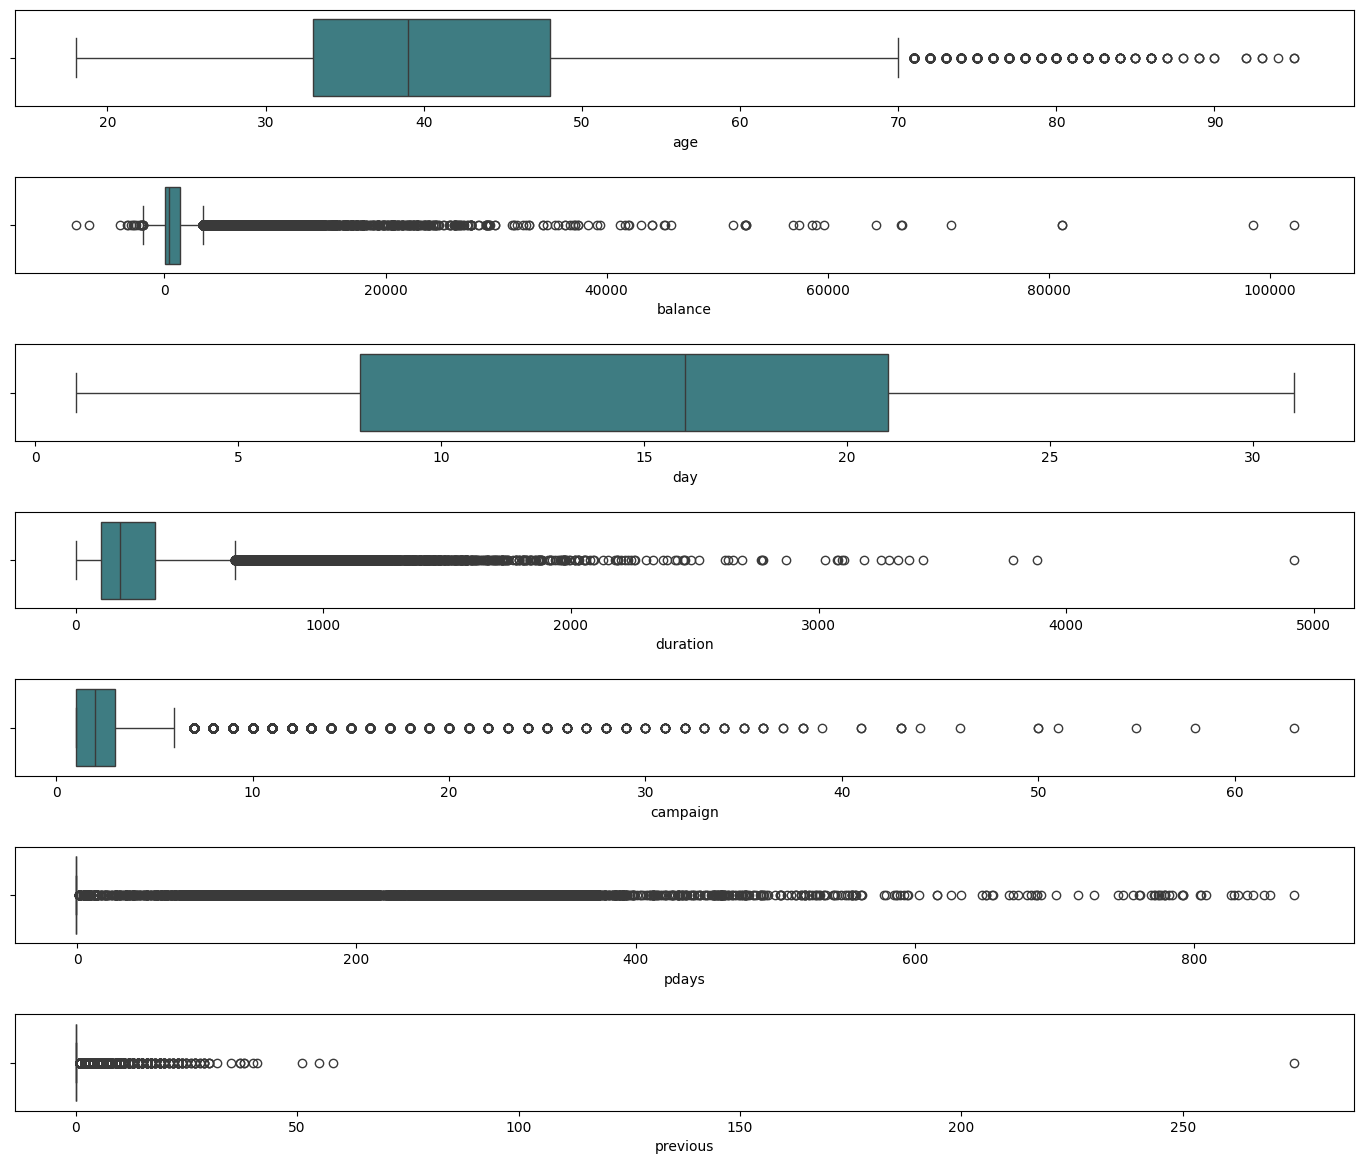

In [22]:
ot=banknew.copy() 
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='age',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='balance',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='day',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='duration',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='campaign',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='pdays',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='previous',data=ot,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

In [23]:
df_new = banknew.copy()

In [24]:
# Split dataset in input and output
X=df_new.drop('Target',axis=1)    # input
Y=df_new['Target']                # output

Try

In [25]:
# # Split dataset in input and output
# # X=df_new[['duration','pdays','contact','housing']]  # input
# X=df_new[['default']] 
# Y=df_new['Target']                # output

TRY

In [26]:
# Now Train_test_split
from sklearn.model_selection import train_test_split
X_test,X_train,Y_test,Y_train=train_test_split(X,Y,test_size=0.3,random_state=1)

In [27]:
# Now applying Scaling on input data X_train and X_test before we train the model
# Apply StandardScaler on input data training and testing
from sklearn.preprocessing import StandardScaler

In [28]:
# Create an object of StandardScaler class
ss=StandardScaler()
#means apply standard scaler for X_train and X_test data

X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [29]:
X_train

array([[ 0.09881684,  0.42807061, -0.09973222, ...,  1.49797145,
         0.83078232,  0.44805792],
       [-0.37151499,  0.31707647,  0.49973948, ...,  1.49797145,
         0.16768173,  0.44805792],
       [-0.84184683, -0.14337018,  0.14005646, ..., -0.7181473 ,
        -1.82162004,  0.44805792],
       ...,
       [-0.93591319, -0.47384628,  1.09921117, ..., -0.7181473 ,
        -1.49006974,  0.44805792],
       [ 0.85134778, -0.47205606, -1.53846429, ...,  1.49797145,
        -0.16386856,  0.44805792],
       [-0.46558136,  1.65938947,  0.73952815, ..., -0.7181473 ,
         1.82543321, -0.55964522]])

In [30]:
# Create the model of LofisticRegression, Why?
# Because we predict the output in Yes/no format as we have a classification type dataset.
# # Use baseline model : LogisticRegression
from sklearn.linear_model import LogisticRegression

In [31]:
# Create an object of LogisticRegression class
lr=LogisticRegression()

In [32]:
# To train the model with 70% data use inbuilt method fit()
lr.fit(X_train,Y_train)

LogisticRegression()

In [33]:
# Test the model with 30% data use inbuilt method predict().
Y_pred=lr.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
# Create a Dictionary
dict={'Actual Output':Y_test,'Predicted Output':Y_pred}
df1=pd.DataFrame(dict)
df1.head(26)

,Actual Output,Predicted Output
6149,0,0
12403,0,0
21645,0,0
29580,0,0
31245,0,0
32032,0,0
18295,0,0
42774,1,0
26345,0,0
31747,0,0


In [35]:
# Check accuracy of model use inbuilt method score() of LogisticRegression.
lr.score(X_test,Y_test)      # Score always varies between 0-1

0.8906373431920878

In [36]:
# Generation Classification report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [37]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     27909
           1       0.61      0.20      0.30      3738

    accuracy                           0.89     31647
   macro avg       0.76      0.59      0.62     31647
weighted avg       0.87      0.89      0.87     31647



In [38]:
print(confusion_matrix(Y_test,Y_pred))

[[27435   474]
 [ 2987   751]]


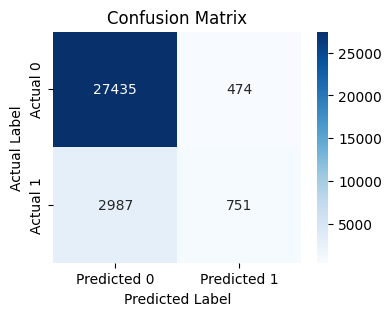

In [39]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
# Plotting the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [40]:
bank['Target'].value_counts()

Target
no     39922
yes     5289
Name: count, dtype: int64

In [41]:
from sklearn.metrics import roc_auc_score, roc_curve

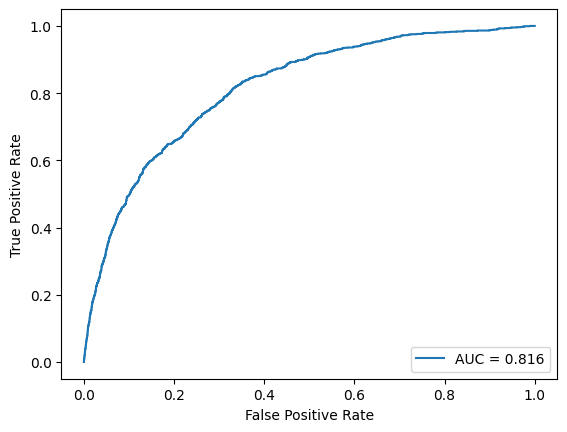

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Prepare the data
X=df_new.drop('Target',axis=1)    # input
Y=df_new['Target']  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Build a logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict the probabilities of the positive class
y_proba = clf.predict_proba(X_test)[:,1]

# Compute the false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calculate the AUC
auc = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label="AUC = {:.3f}".format(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [43]:
from sklearn.model_selection import cross_val_score
lr = LogisticRegression()
scores = cross_val_score(lr, X, Y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.81884539 0.86352577 0.86352577 0.86706481 0.88365406 0.88564477
 0.89404999 0.90026537 0.9004645  0.90997567]
0.8787016088173123
